# Project 1: Sales Data Analysis

## Transformation of data

In [78]:
# Imports libraries for data manipulation and visualisation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [79]:
# Loading the data
data_frame = pd.read_csv("Sales Data.csv")

In [80]:
# Verifying the loading proccess succed and showing basic information of the loaded data
print(data_frame.head())
print(data_frame.info())

   Order ID               Product  Quantity Ordered  Price Each  \
0    295665    Macbook Pro Laptop                 1     1700.00   
1    295666    LG Washing Machine                 1      600.00   
2    295667  USB-C Charging Cable                 1       11.95   
3    295668      27in FHD Monitor                 1      149.99   
4    295669  USB-C Charging Cable                 1       11.95   

            Order Date                        Purchase Address  Month  \
0  2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12   
1  2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   
2  2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12   
3  2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   
4  2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12   

     Sales            City  Hour  
0  1700.00   New York City     0  
1   600.00   New York City     7  
2    11.95   New York City    18  
3   149.99   San F

In [81]:
# Showing value counts of each column
data_frame["Product"].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

In [82]:

data_frame.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [83]:
# Displaying basic information of each column and if they contain null values

for column in data_frame.columns:
    data_type = data_frame[column].dtype
    is_format_consistent = all(data_frame[column].notnull())
    print(
        """
          Column: {}
          Data Type: {}
          Is Format Consistent: {}
          -------------------------
          """.format(
            column, data_type, is_format_consistent
        )
    )


          Column: Order ID
          Data Type: int64
          Is Format Consistent: True
          -------------------------
          

          Column: Product
          Data Type: object
          Is Format Consistent: True
          -------------------------
          

          Column: Quantity Ordered
          Data Type: int64
          Is Format Consistent: True
          -------------------------
          

          Column: Price Each
          Data Type: float64
          Is Format Consistent: True
          -------------------------
          

          Column: Order Date
          Data Type: object
          Is Format Consistent: True
          -------------------------
          

          Column: Purchase Address
          Data Type: object
          Is Format Consistent: True
          -------------------------
          

          Column: Month
          Data Type: int64
          Is Format Consistent: True
          -------------------------
          

     

In [84]:
# Converting the ["Order Date"] column to datetime data type

data_frame["Order Date"] = pd.to_datetime(data_frame["Order Date"])

In [85]:
# Extracting and defining Month and Hour from Order Date

data_frame["Month"] = data_frame["Order Date"].dt.month
data_frame["Hour"] = data_frame["Order Date"].dt.hour

## Data Visualisation

In [86]:
# Extracting the max value from Month and grouping Sales summatory by Month

sales_by_month = data_frame.groupby("Month")["Sales"].sum().reset_index()
sales_by_month

,Month,Sales
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


In [87]:
# Converting months to name format

months = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]
sales_by_month["Month"] = sales_by_month["Month"].astype("string")

for index in sales_by_month.index:
    month = int(sales_by_month["Month"][index])
    month = months[month - 1]
    sales_by_month["Month"][index] = month
sales_by_month

,Month,Sales
0,Jan,1822256.73
1,Feb,2202022.42
2,Mar,2807100.38
3,Apr,3390670.24
4,May,3152606.75
5,Jun,2577802.26
6,Jul,2647775.76
7,Aug,2244467.88
8,Sep,2097560.13
9,Oct,3736726.88


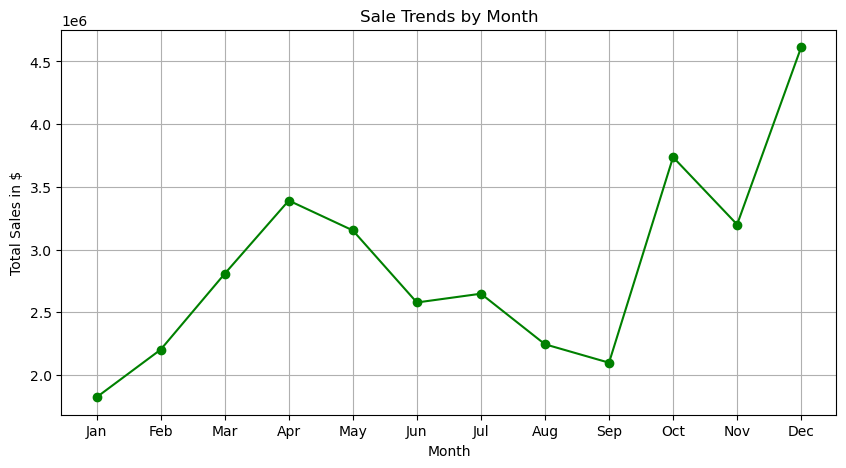

In [88]:
# Visualising Sales by Month with plot

plt.figure(figsize=(10, 5))
plt.plot(
    sales_by_month["Month"],
    sales_by_month["Sales"],
    marker="o",
    linestyle="-",
    color="g",
)
plt.title("Sale Trends by Month")
plt.xlabel("Month")
plt.ylabel("Total Sales in $")
plt.grid(True)
plt.show()

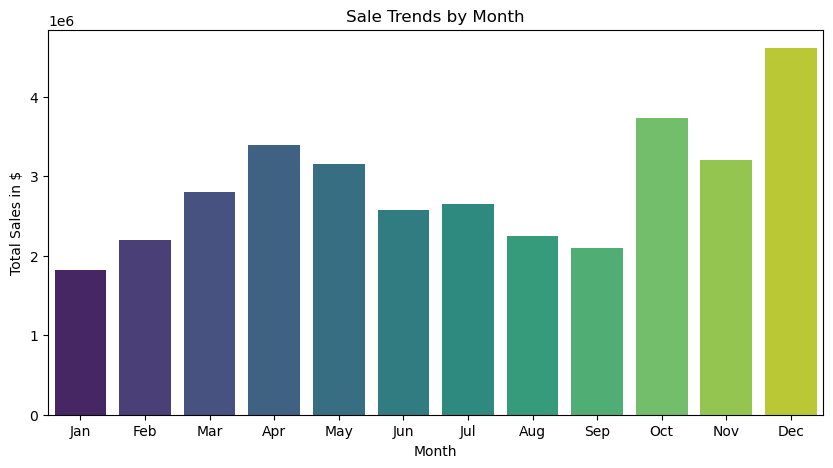

In [89]:
# Visualising Sales by Month with bar graphic

plt.figure(figsize=(10, 5))
sbn.barplot(
    x="Month",
    y="Sales",
    data=sales_by_month,
    hue="Month",
    palette="viridis",
    legend=False,
)
plt.title("Sale Trends by Month")
plt.xlabel("Month")
plt.ylabel("Total Sales in $")
plt.show()

In [90]:
# Extracting information about best selling products by grouping Quantity Ordered by Product

best_selling_products = (
    data_frame.groupby("Product")["Quantity Ordered"].sum().reset_index()
)
best_selling_products.head()

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635


In [91]:
# Ordering the data

limit = 5
best_selling_products = best_selling_products.sort_values(
    by="Quantity Ordered", ascending=False
).head(limit)
best_selling_products

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31017
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23975
12,Lightning Charging Cable,23217
17,Wired Headphones,20557


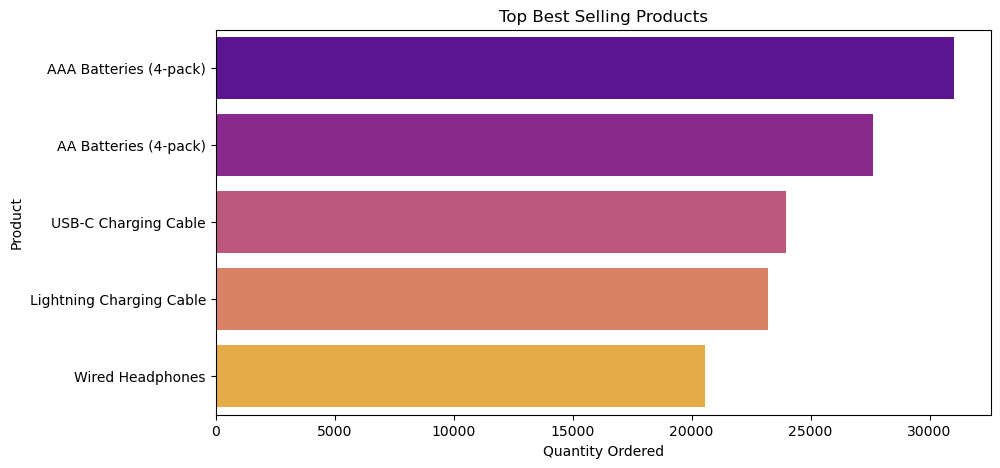

In [92]:
# Visualising the data with bar graphic

plt.figure(figsize=(10, 5))
sbn.barplot(
    x="Quantity Ordered",
    y="Product",
    hue="Product",
    data=best_selling_products,
    palette="plasma",
    legend=False,
)
plt.title("Top Best Selling Products")
plt.xlabel("Quantity Ordered")
plt.ylabel("Product")
plt.show()

In [93]:
# Extracting information about top cities at sales by grouping Sales summatory by City

top_cities_by_sales = data_frame.groupby("City")["Sales"].sum().reset_index()
top_cities_by_sales

,City,Sales
0,Atlanta,2795498.58
1,Austin,1819581.75
2,Boston,3661642.01
3,Dallas,2767975.40
4,Los Angeles,5452570.80
5,New York City,4664317.43
6,Portland,2320490.61
7,San Francisco,8262203.91
8,Seattle,2747755.48


In [94]:
# Ordering the data

top_cities_by_sales = top_cities_by_sales.sort_values(by="Sales", ascending=False).head(
    limit
)
top_cities_by_sales

,City,Sales
7,San Francisco,8262203.91
4,Los Angeles,5452570.80
5,New York City,4664317.43
2,Boston,3661642.01
0,Atlanta,2795498.58


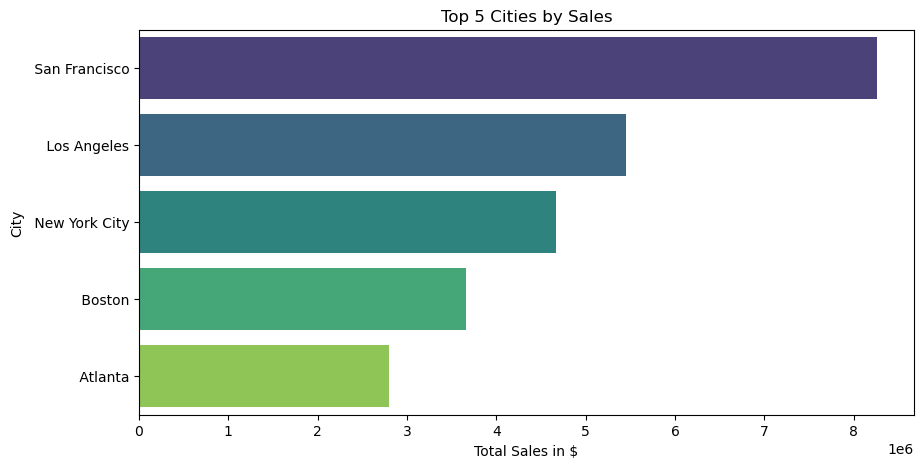

In [95]:
# Visualising the data with bar graphic

plt.figure(figsize=(10, 5))
sbn.barplot(
    x="Sales",
    y="City",
    data=top_cities_by_sales,
    hue="City",
    palette="viridis",
    legend=False,
)
plt.title(f"Top {limit} Cities by Sales")
plt.xlabel("Total Sales in $")
plt.ylabel("City")
plt.show()

In [96]:
# Extracting information about sales by weekday by grouping Sales summatory by Weekday

data_frame["Weekday"] = pd.to_datetime(data_frame["Order Date"]).dt.weekday
sales_by_weekday = data_frame.groupby("Weekday")["Sales"].sum().reset_index()
sales_by_weekday

,Weekday,Sales
0,0,4883326.72
1,1,5087956.78
2,2,4988822.26
3,3,4839465.16
4,4,4855938.38
5,5,4904357.01
6,6,4932169.66


In [97]:
# Converting weekdays to name format

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sales_by_weekday["Weekday"] = sales_by_weekday["Weekday"].astype("string")

for index in sales_by_weekday.index:
    weekday = int(sales_by_weekday["Weekday"][index])
    weekday = days[weekday]
    sales_by_weekday["Weekday"][index] = weekday
sales_by_weekday

,Weekday,Sales
0,Monday,4883326.72
1,Tuesday,5087956.78
2,Wednesday,4988822.26
3,Thursday,4839465.16
4,Friday,4855938.38
5,Saturday,4904357.01
6,Sunday,4932169.66


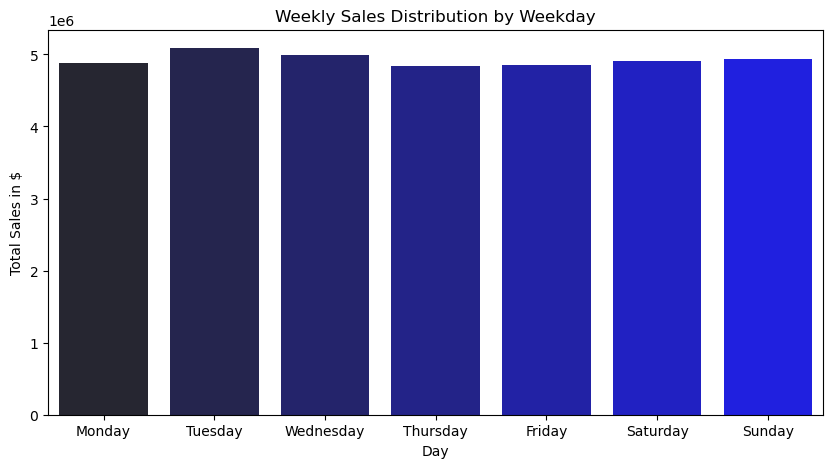

In [98]:
# Visualising the data with bar graphic

plt.figure(figsize=(10, 5))
sbn.barplot(
    x="Weekday",
    y="Sales",
    data=sales_by_weekday,
    hue="Weekday",
    palette="dark:blue",
    legend=False,
)
plt.title("Weekly Sales Distribution by Weekday")
plt.xlabel("Day")
plt.ylabel("Total Sales in $")
plt.show()

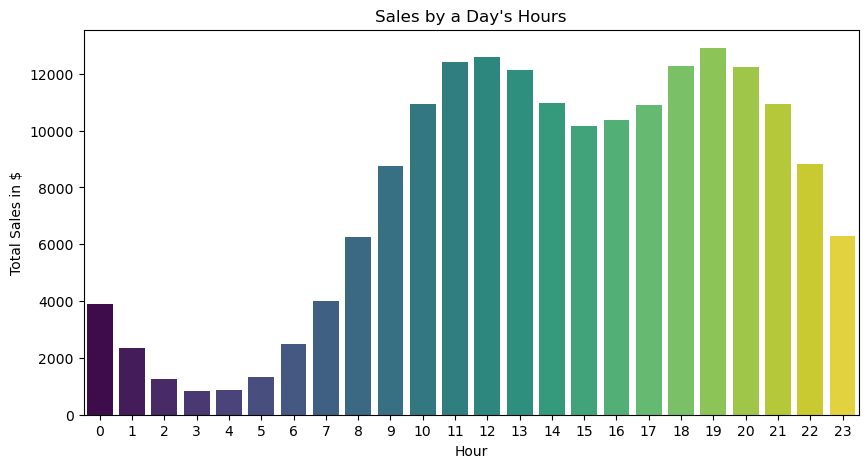

In [99]:
# Visualising Sales by Hour with bar graphic

plt.figure(figsize=(10, 5))
sbn.countplot(x="Hour", data=data_frame, hue="Hour", palette="viridis", legend=False)
plt.title("Sales by a Day's Hours")
plt.xlabel("Hour")
plt.ylabel("Total Sales in $")
plt.show()

In [100]:
# Calculating total profit

total_profit = data_frame["Sales"].sum()
total_profit

34492035.97

In [101]:
# Calculating sales quantity

sales_quantity = data_frame["Quantity Ordered"].sum()
sales_quantity

209079

In [102]:
# Caluculating profit margin with profit margin percentage formula

total_sales = data_frame["Sales"].sum()
total_cost = data_frame["Price Each"].sum()
profit_margin = ((total_sales - total_cost) / total_sales) * 100
profit_margin = "{:.2f}%".format(profit_margin)
profit_margin

'0.59%'